In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
import seaborn as sns
from sklearn.model_selection import  train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Load, encode and split data

In [2]:
df = pd.read_excel("shoe.xlsx")

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [4]:
le = LabelEncoder()
df['class(y)'] = le.fit_transform(df['class(y)'])

In [5]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [6]:
xtrain, xtest, ytrain, ytest = tts(df[['size(cm)']],df['class(y)'],test_size=0.3,random_state=100)

# Decision Tree Classifier

In [7]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [8]:
dt_acc = dt.score(xtest, ytest)

In [9]:
dt_pred = dt.predict(xtest)

In [10]:
dt_mse = mean_squared_error(ytest, dt_pred)

In [11]:
dt_mae = mean_absolute_error(ytest, dt_pred)

# KNN Classifier

In [12]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [13]:
knn_acc = knn.score(xtest, ytest)

In [14]:
knn_pred = knn.predict(xtest)

In [15]:
knn_mse = mean_squared_error(ytest, knn_pred)

In [16]:
knn_mae = mean_absolute_error(ytest, knn_pred)

# Logistic Regression Classifier

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [20]:
lr_acc = lr.score(xtest, ytest)

In [21]:
lr_pred = lr.predict(xtest)

In [22]:
lr_mse = mean_squared_error(ytest, lr_pred)

In [23]:
lr_mae = mean_absolute_error(ytest, lr_pred)

# Accuracy Comparison

In [24]:
data = {
    'Classifier': ['Decision Tree', 'KNearestNeighbour', 'Logistic Regression'],
    'Accuracy': [dt_acc, knn_acc, lr_acc]
}
data = pd.DataFrame(data=data)

<Axes: xlabel='Classifier', ylabel='Accuracy'>

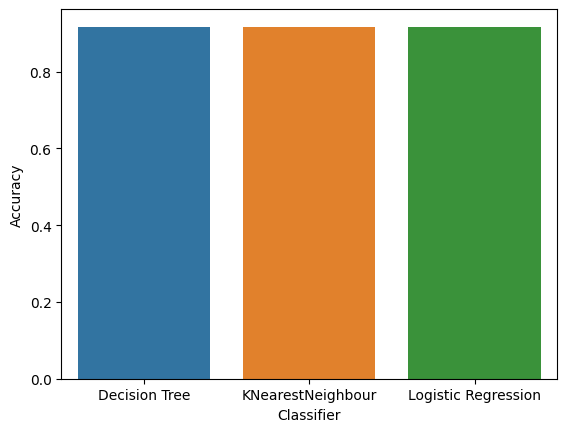

In [26]:
sns.barplot(x='Classifier',y='Accuracy',data=data)

# MSE Comparison

In [27]:
data = {
    'Classifier': ['Decision Tree', 'KNearestNeighbour', 'Logistic Regression'],
    'MSE': [dt_mse, knn_mse, lr_mse]
}
data = pd.DataFrame(data=data)

<Axes: xlabel='Classifier', ylabel='MSE'>

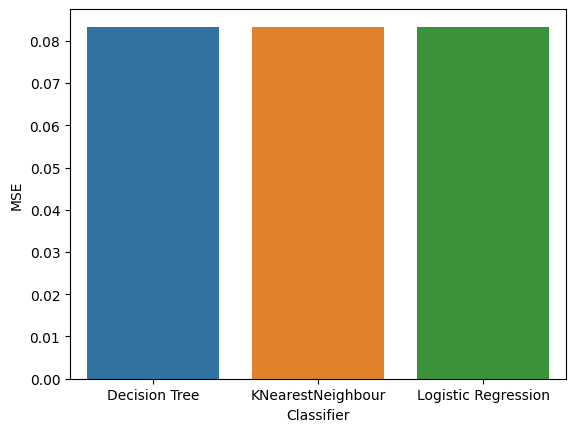

In [28]:
sns.barplot(x='Classifier',y='MSE',data=data)

# MAE Comparison

In [29]:
data = {
    'Classifier': ['Decision Tree', 'KNearestNeighbour', 'Logistic Regression'],
    'MAE': [dt_mae, knn_mae, lr_mae]
}
data = pd.DataFrame(data=data)

<Axes: xlabel='Classifier', ylabel='MAE'>

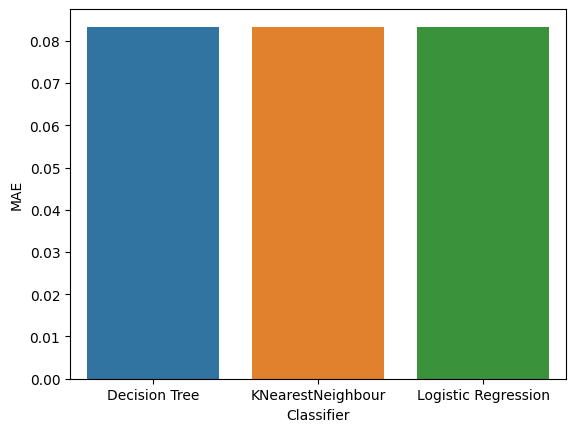

In [30]:
sns.barplot(x='Classifier',y='MAE',data=data)